Overview

Here we are going to take the dataset containing a daily Sales and Profit of a Superstore in 4 year from 2015 to 2018.
There are several Categories in the Superstore sale data, we will start from time series analysis and forcasting for the 'Office Supplies' sales:


In [1]:
#Import necessary packages and libraries
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [2]:
#Loading dataset
df=pd.read_csv('C:/Users/0&1/OneDrive/Documents/Dataset- Superstore (2015-2018).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
#kinds of products
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [4]:
#Office Supplies category data
office= df.loc[df['Category']=='Office Supplies']
office.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [5]:
#getting the duration of selling office supplies
print('Starting date:',office['Order Date'].min())
print('Ending date:',office['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


DataProcessing

In this process, we will removing unrelevant variables, handling missing data, aggregate sales by date.

In [6]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


office.drop(cols, axis=1, inplace= True)
office

C:\Users\0&1\AppData\Local\Temp\ipykernel_4736\1632486437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.drop(cols, axis=1, inplace= True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [7]:
### Check out missing values:
office.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
#Aggregate sum of Office Supplies by date
office= office.groupby('Order Date')['Sales'].sum().reset_index()
office.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


In [9]:
#Import data with indexing time series data
office['Order Date'] = pd.to_datetime(df['Order Date'])
office= office.set_index('Order Date')
office

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


Data Visualization

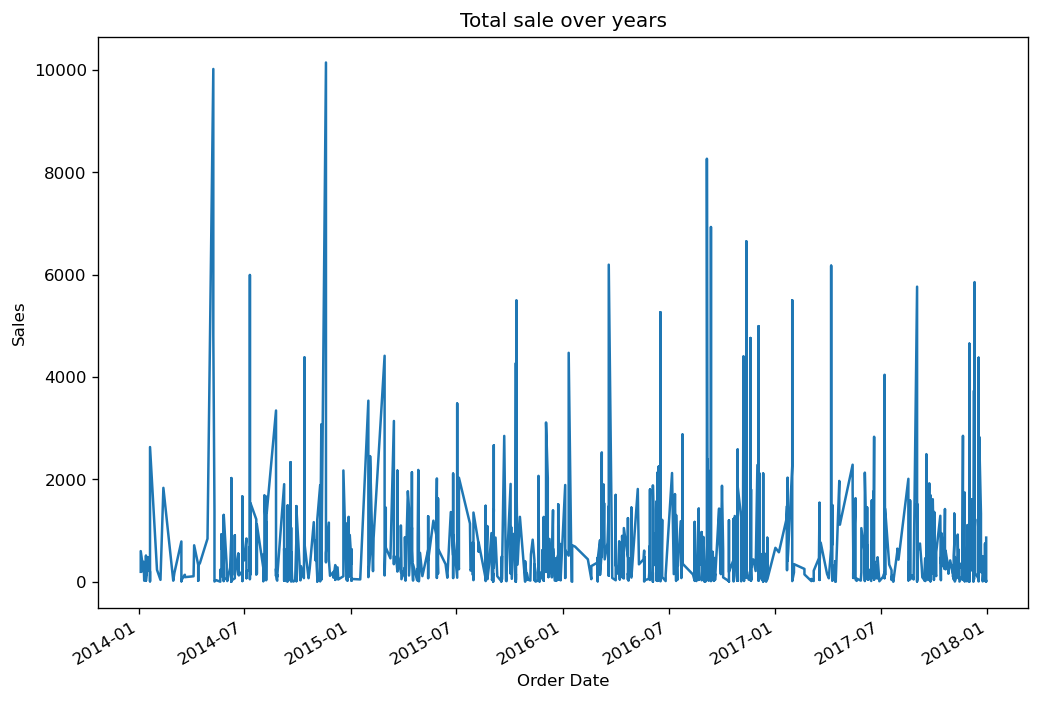

In [10]:
office['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [11]:
#create new DataFrame
monthly_office = pd.DataFrame()

monthly_office['Sales'] = office['Sales'].resample('MS').mean()

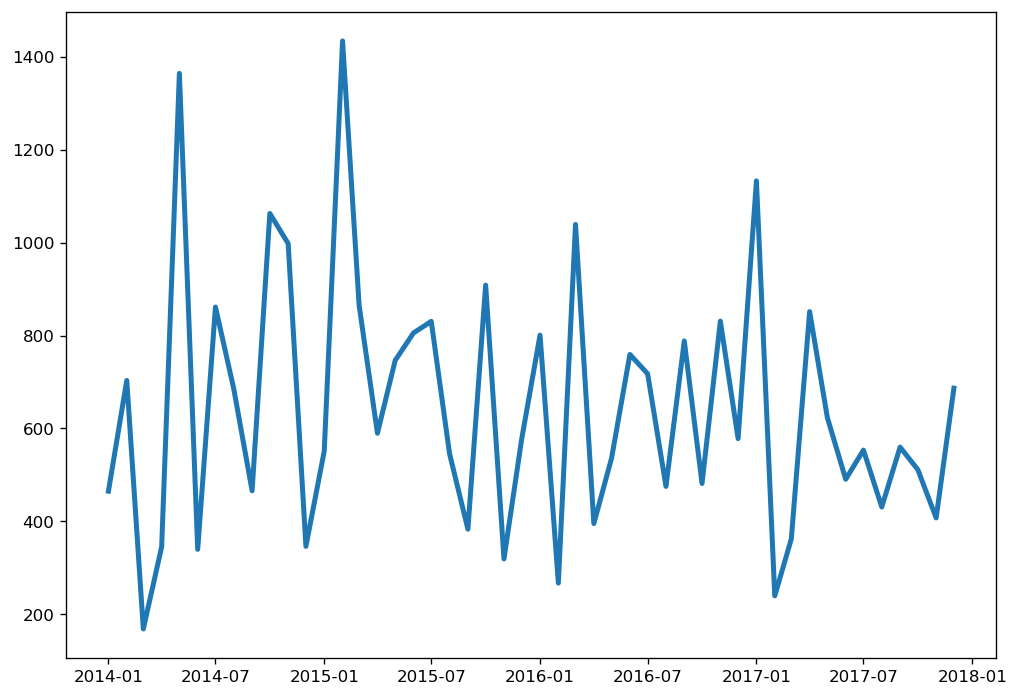

In [12]:
#plot weekly sales data
plt.plot(monthly_office.index, monthly_office.Sales, linewidth=3)

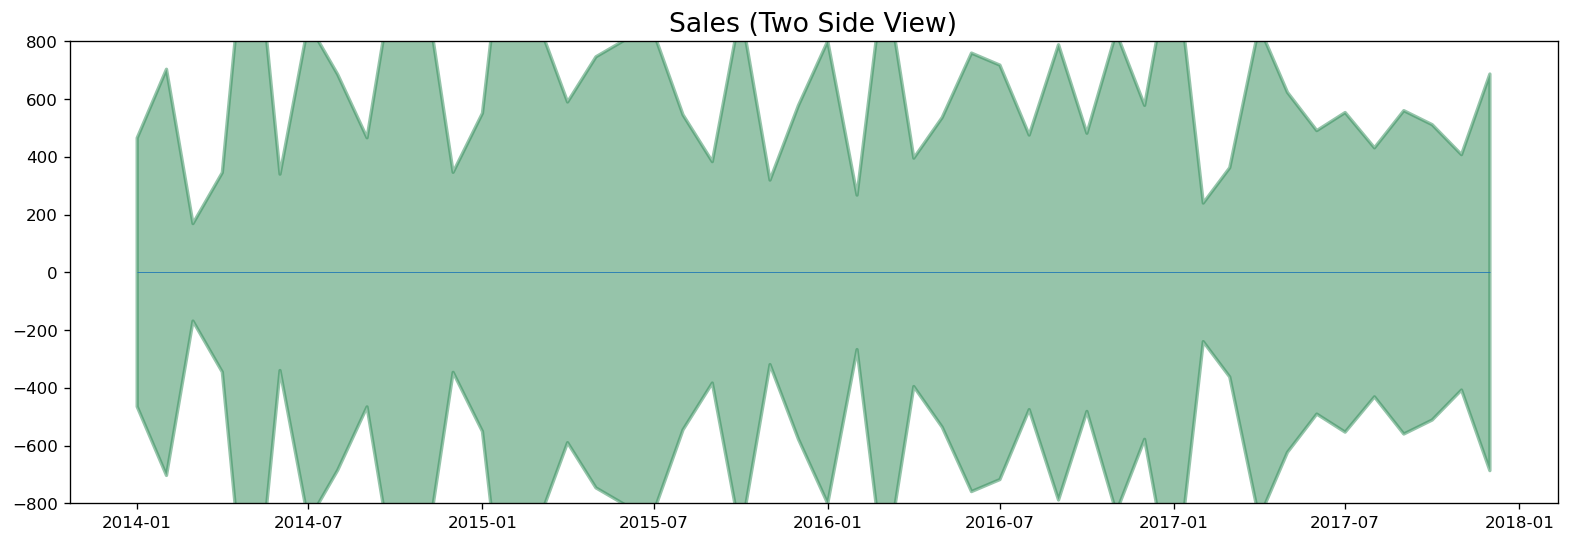

In [13]:
#show on both sides of Y-axis
x= monthly_office.index
y1= monthly_office['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_office.index), xmax=np.max(monthly_office.index), linewidth=.5)
plt.show()


In [14]:
office['year'] = [d.year for d in office.index]
office['month'] = [d.strftime('%b') for d in office.index]
years= office['year'].unique()
years

array([2016, 2015, 2014, 2017], dtype=int64)

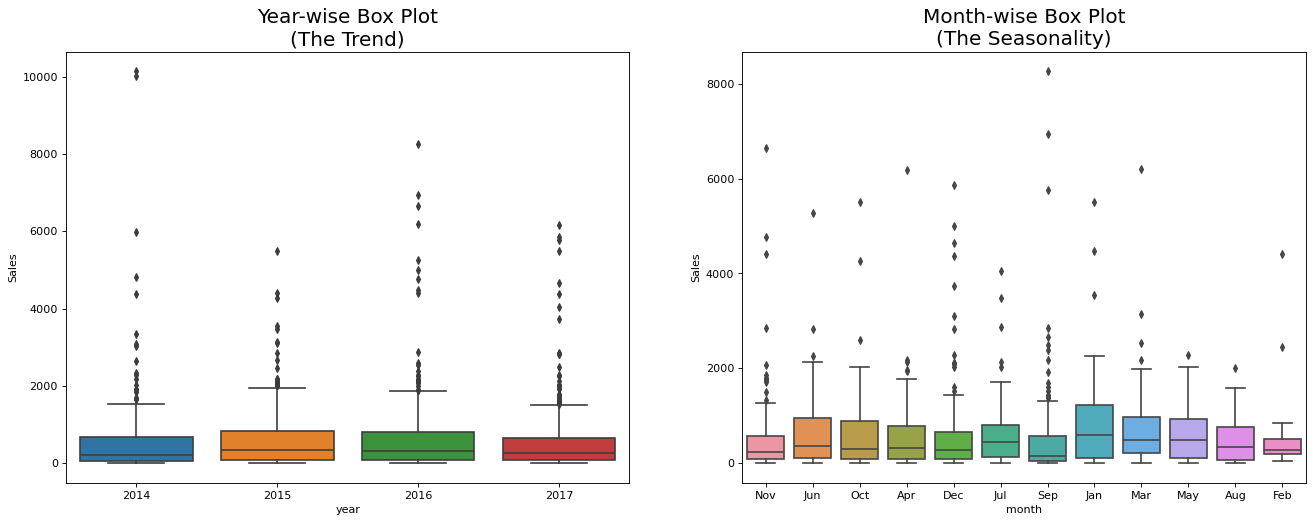

In [15]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=office, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=office.loc[~office.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

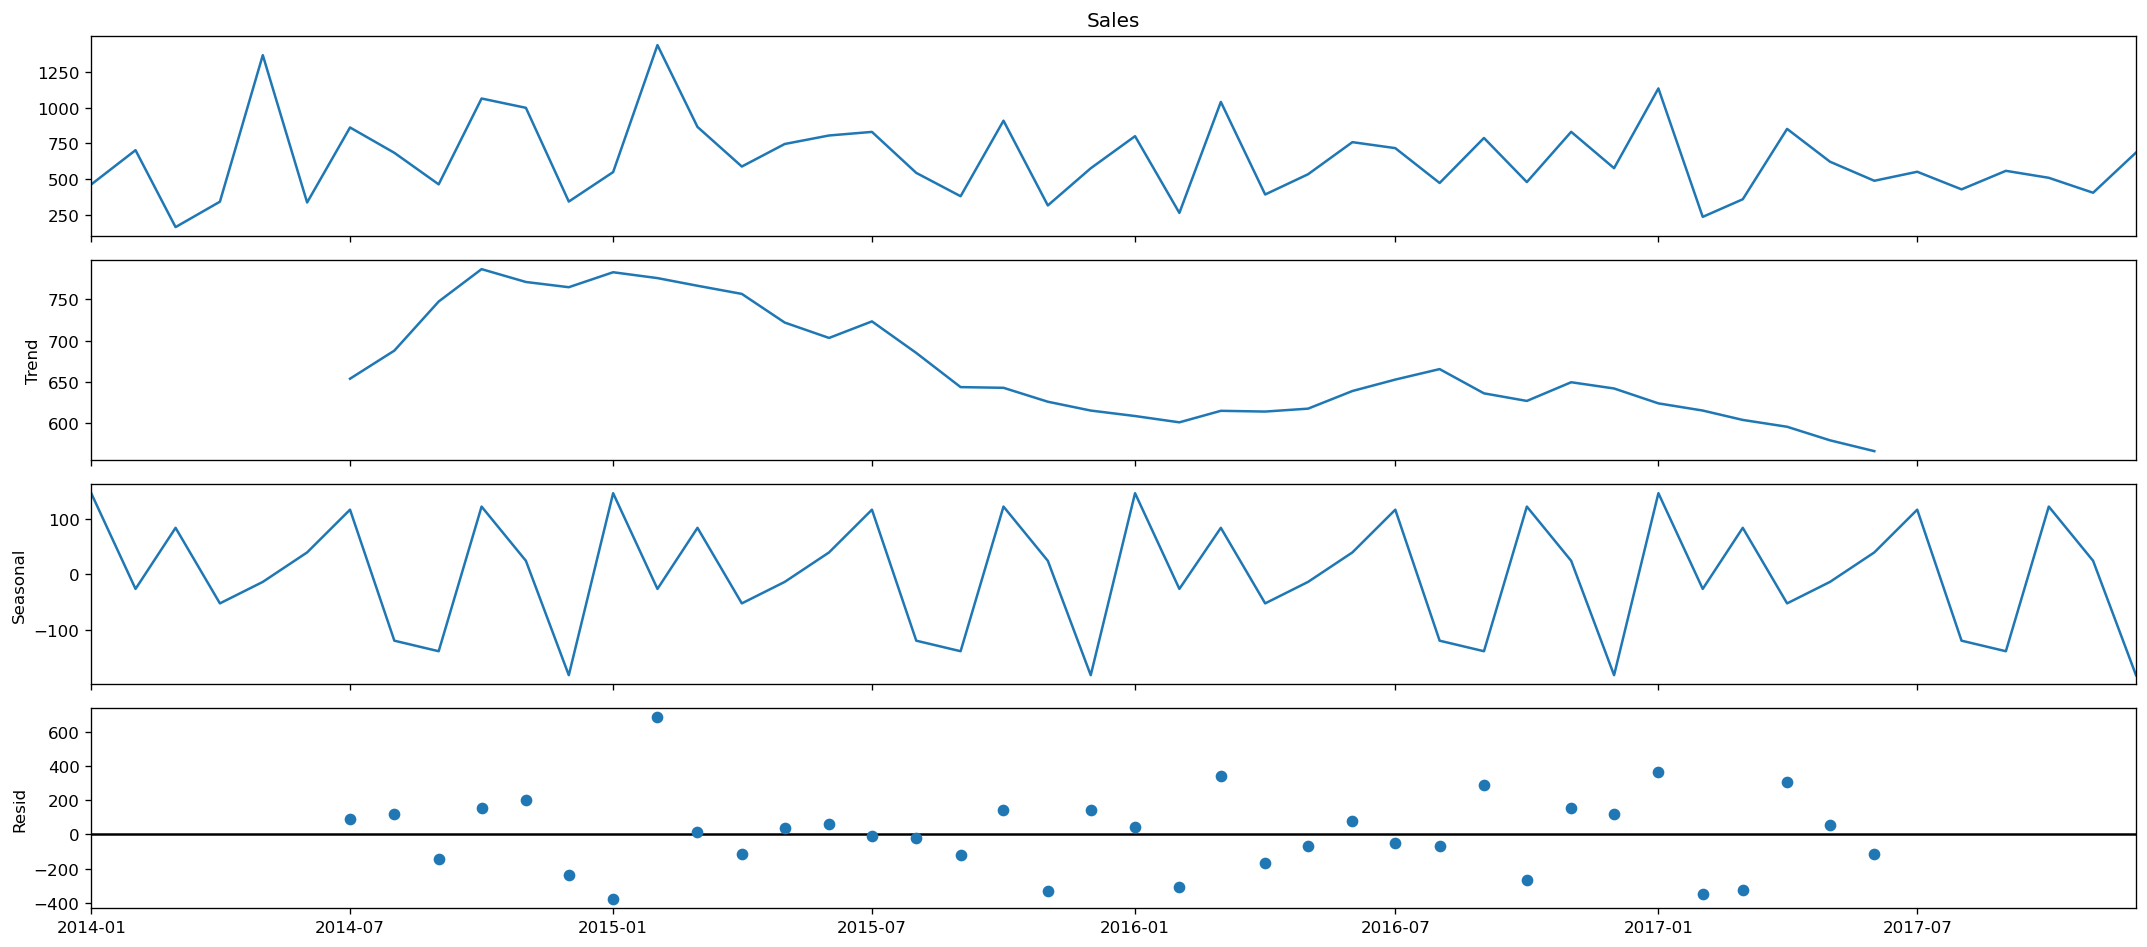

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_office['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

check stationary of the dataset

In [17]:
#Determing rolling statistics
moving_avg = monthly_office.rolling(12).mean()
moving_std= monthly_office.rolling(12).std()

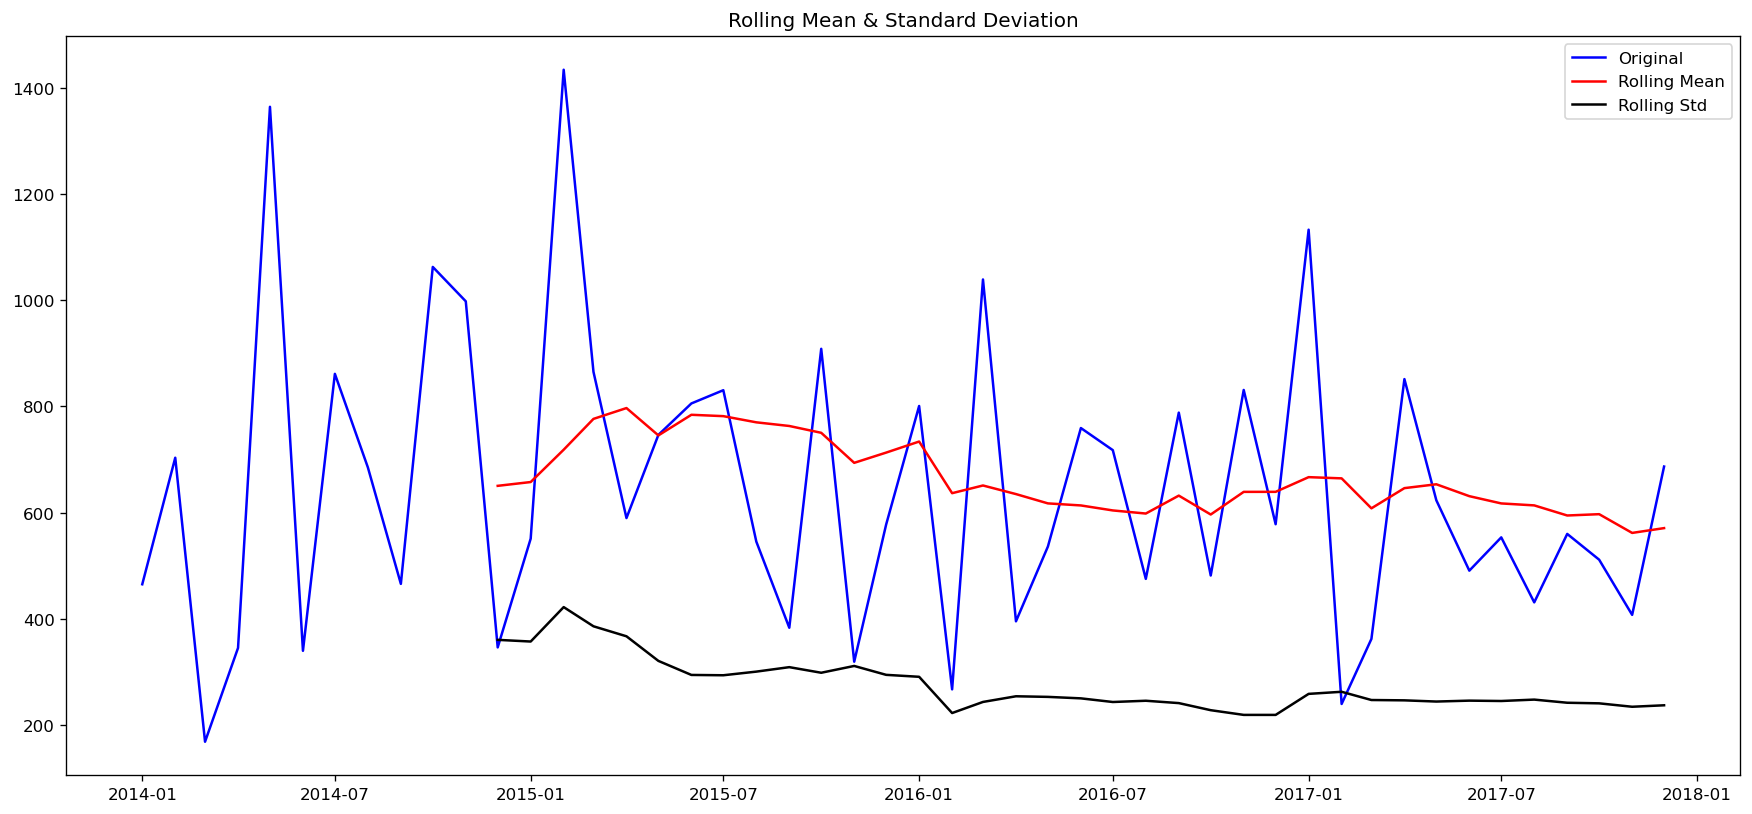

In [18]:
#Plot rolling statistics:
orig = plt.plot(monthly_office, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dickey-Fuller test:

In [19]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_office, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.630238
p-value                         0.467366
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


 Decomposing:

In [20]:
do= pd.read_csv('C:/Users/0&1/OneDrive/Documents/Dataset- Superstore (2015-2018).csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

C:\Users\0&1\AppData\Local\Temp\ipykernel_4736\472094236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store.drop(cols, axis=1, inplace=True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [21]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [22]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [23]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()

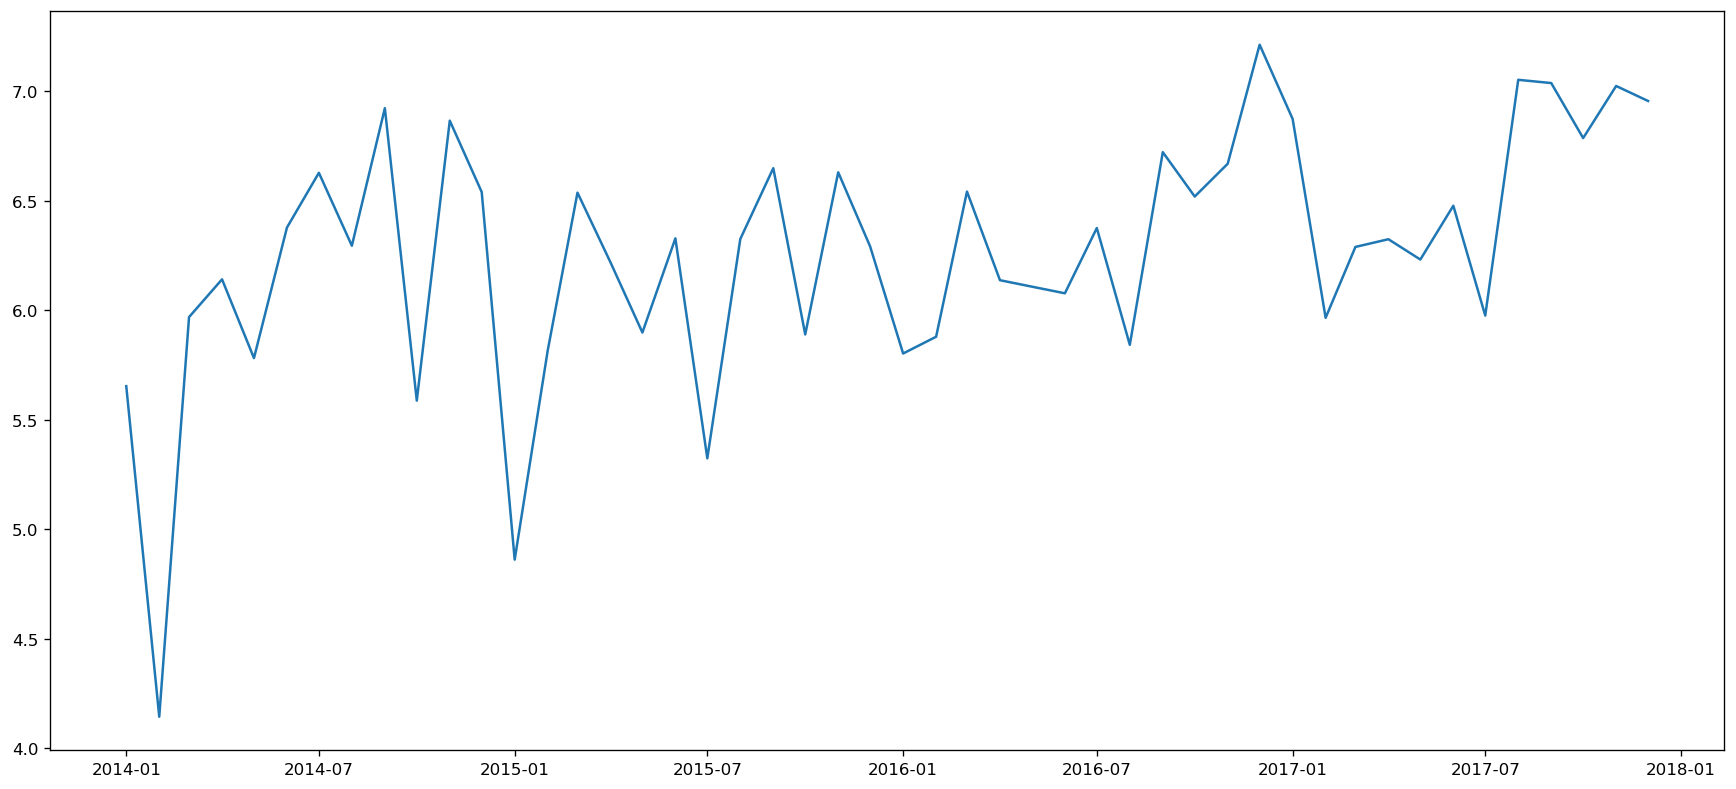

In [24]:
#take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

Moving Average:

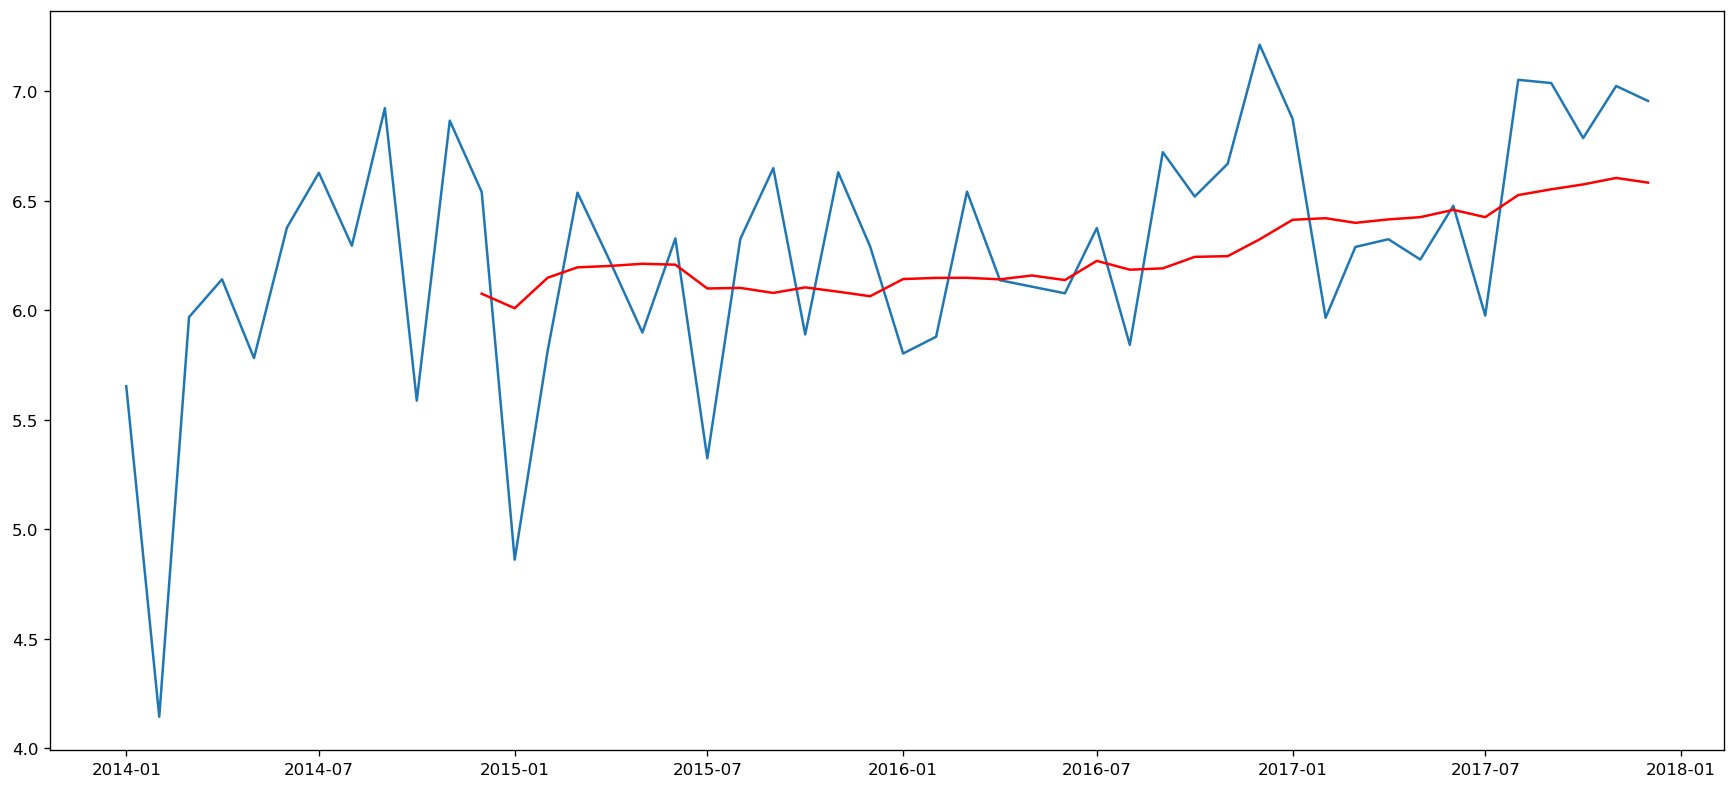

In [25]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [26]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

In [27]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

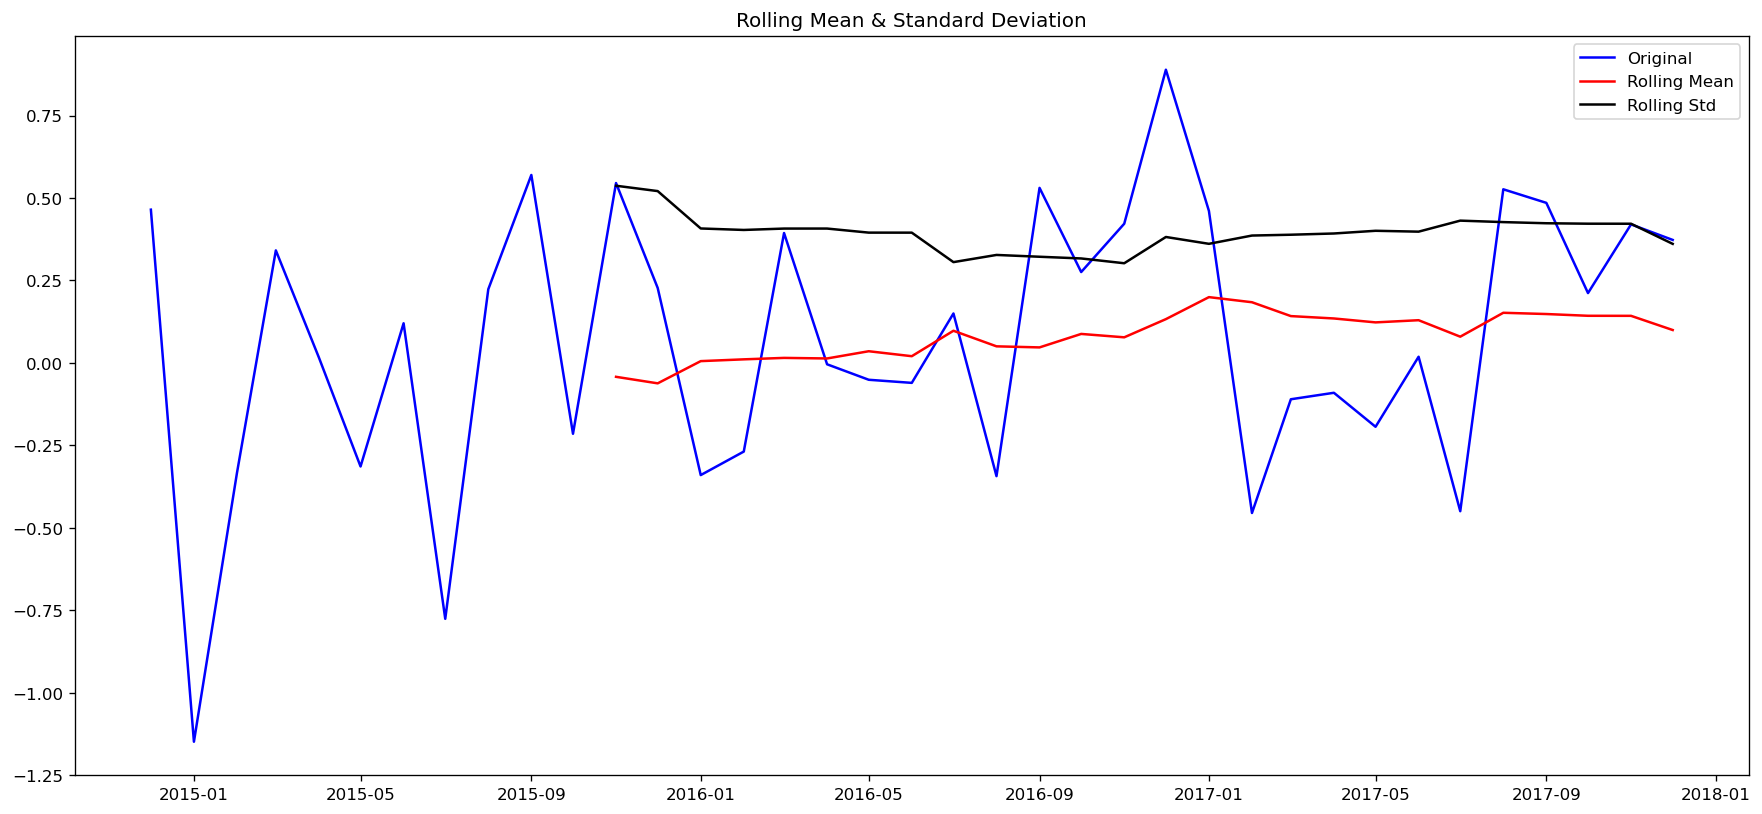

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [28]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Decomposing:

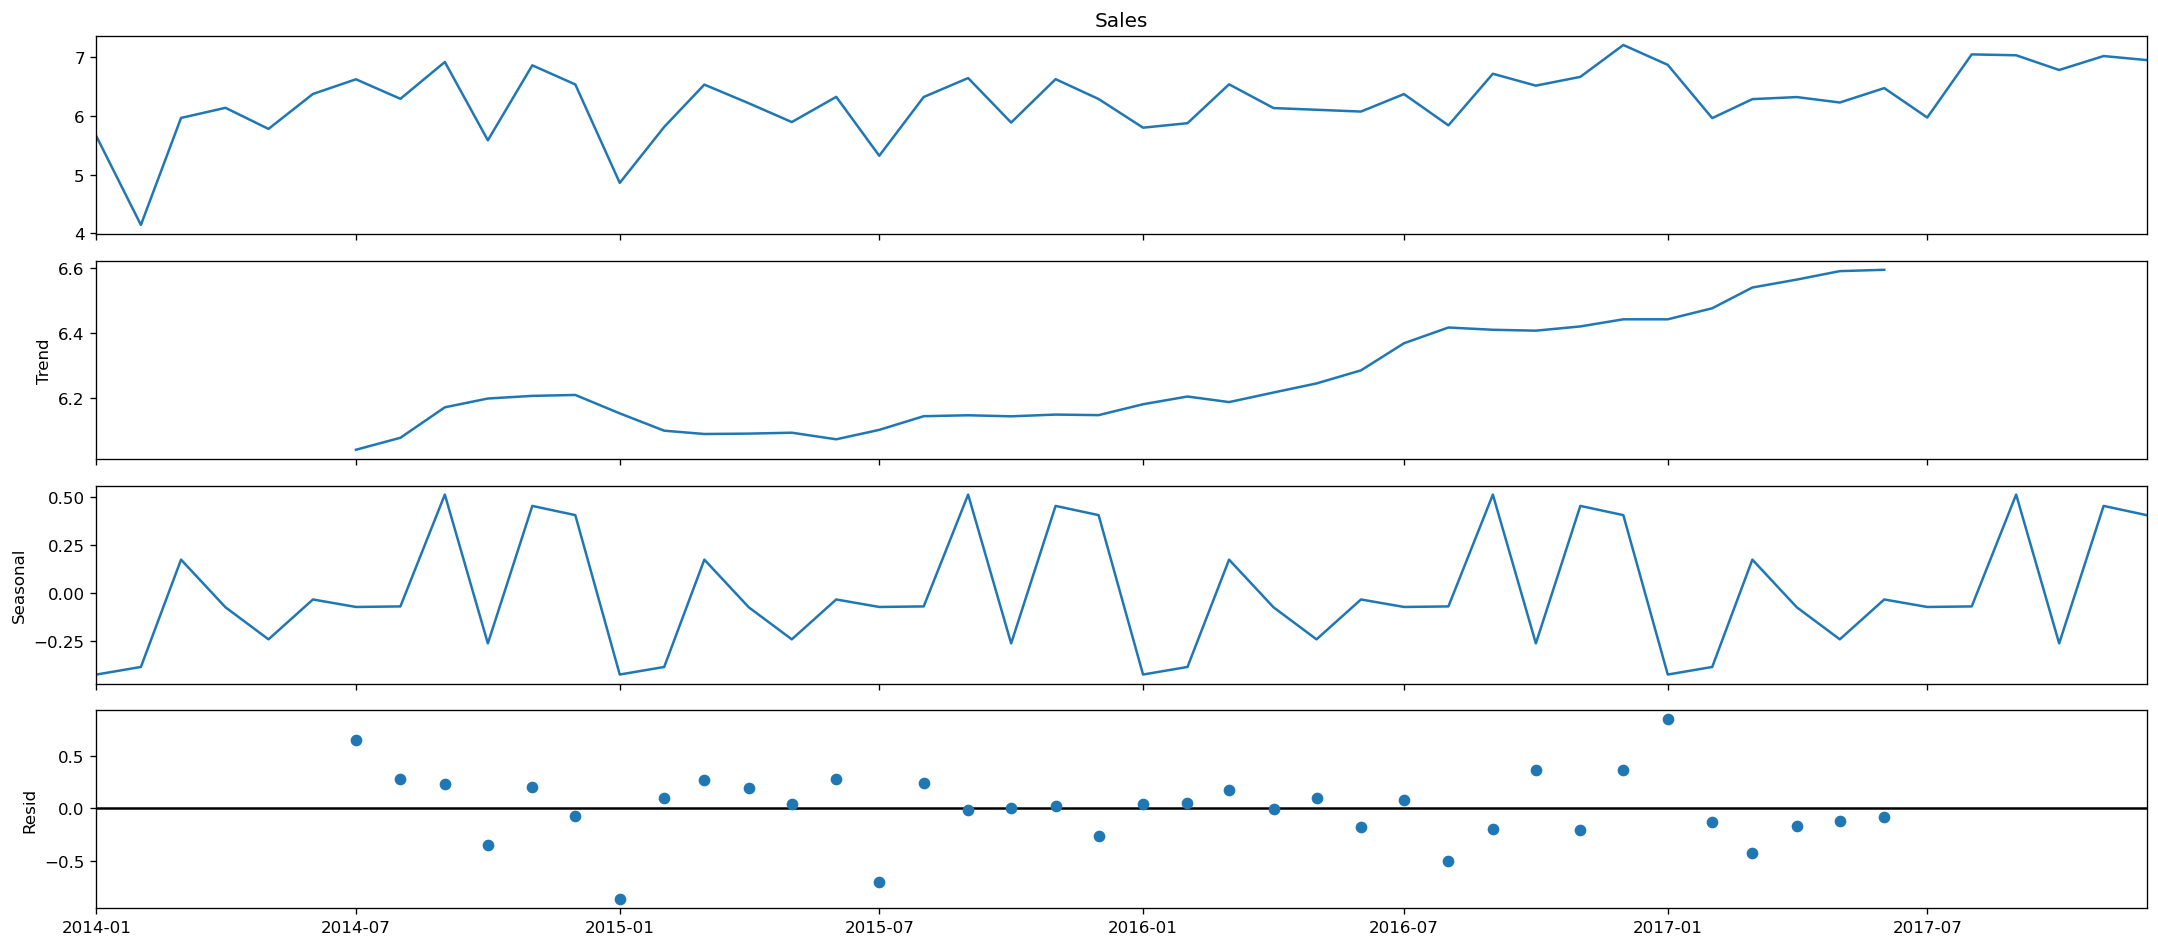

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

check stationarity of residuals:

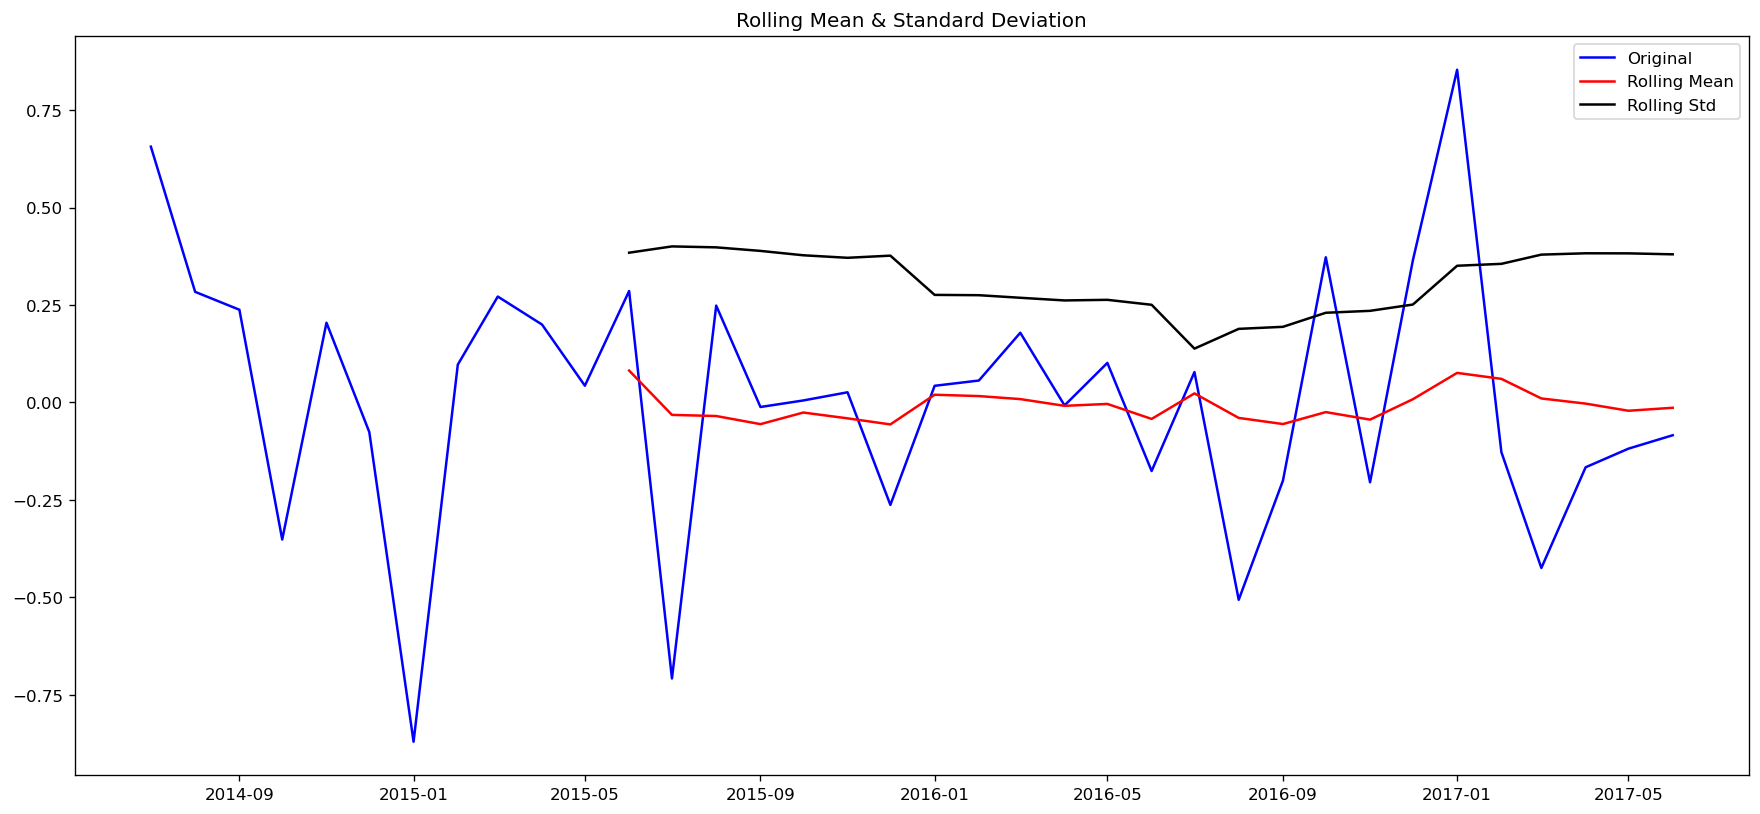

Results of Dickey-Fuller Test:
Test Statistic                 -4.901459
p-value                         0.000035
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Splitting

In [31]:
train= y[:40]
test= y[40:]

In [33]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

Defaulting to user installation because normal site-packages is not writeable


In [34]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.11 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.051 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=666.940, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=668.928, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=665.748, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=671.902, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=667.718, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=667.709, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=666.599, Time=0.0

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Build ARIMA model:

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Mon, 17 Jun 2024   AIC                            552.176
Time:                        17:28:51   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predict test dataset:

In [37]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236655
2017-06-01    616.500453
2017-07-01    617.534868
2017-08-01    617.682176
2017-09-01    617.703154
2017-10-01    617.706141
2017-11-01    617.706566
2017-12-01    617.706627
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

ARIMA- Model Evaluation: using MAPE

In [39]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.363205


Plot prediction for test value:

<Axes: xlabel='Order Date'>

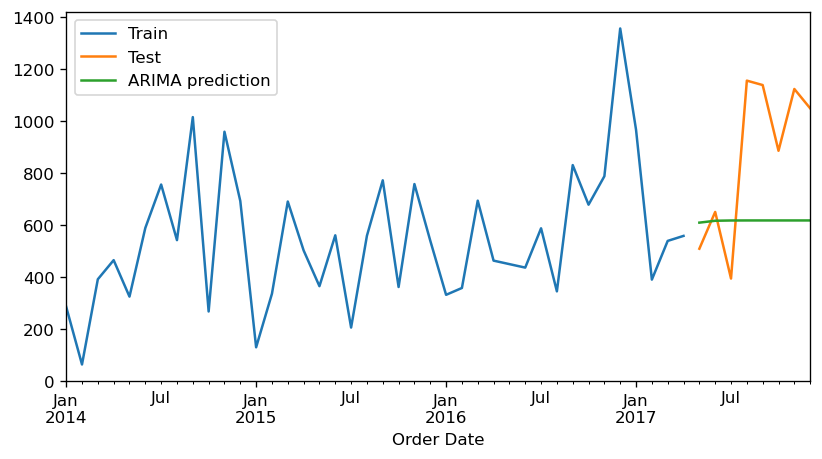

In [40]:
train.plot(legend=True, label='Train', figsize=(8,4))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

 FORECAST DATA USING SARIMAX model:

In [41]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Mon, 17 Jun 2024   AIC                            388.486
Time:                                    17:29:27   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.839      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9971      0.465     -2.143      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+26. Standard errors may be unstable.
"""

In [42]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.241382
2017-06-01     636.977762
2017-07-01     686.344108
2017-08-01     583.600265
2017-09-01     997.206942
2017-10-01     638.863653
2017-11-01     957.404488
2017-12-01    1119.313668
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

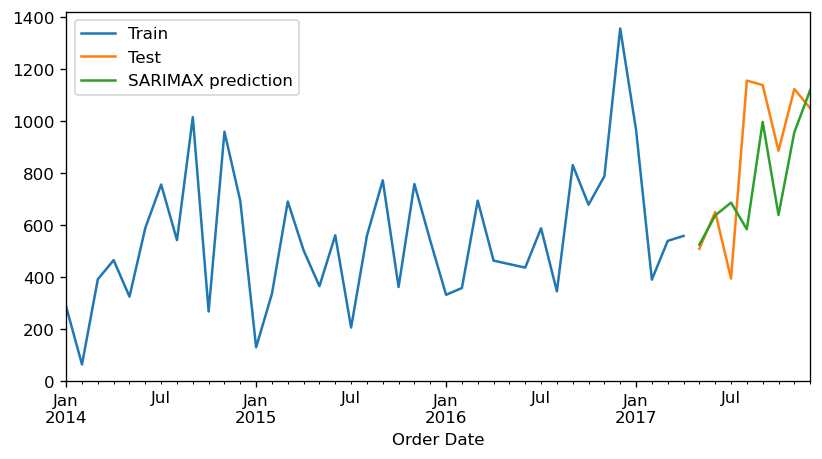

In [43]:
train.plot(legend=True, label='Train', figsize=(8,4))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

SARIMAX MODEL EVALUATION: MAPE

In [44]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.238379


PREDICT FUTURE SALE WITH ARIMAX:

In [45]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01     733.854507
2018-02-01     467.394544
2018-03-01     714.994467
2018-04-01     671.125998
2018-05-01     602.597972
2018-06-01     738.383751
2018-07-01     762.827160
2018-08-01     692.283029
2018-09-01    1089.005491
2018-10-01     682.944828
2018-11-01    1049.901214
2018-12-01    1117.471406
2019-01-01     733.074127
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

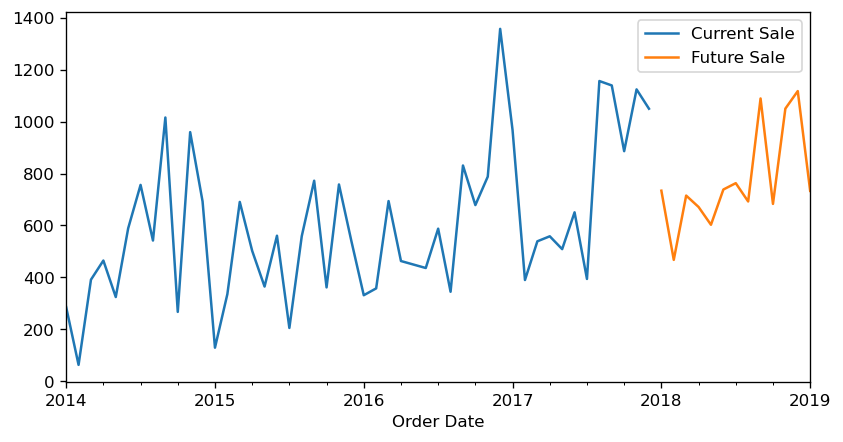

In [46]:
y.plot(legend=True, label='Current Sale', figsize=(8,4))

future_sale.plot(legend= True, label='Future Sale')